In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from ngboost import NGBClassifier
from ngboost.distns import Bernoulli, k_categorical
from ngboost.learners import default_tree_learner

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
import keras
from keras.datasets import mnist
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

print(y_train[:10])

Using TensorFlow backend.


60000 train samples
10000 test samples
[5 0 4 1 9 2 1 3 1 4]


In [3]:
ngb = NGBClassifier(
    Dist = k_categorical(10)
)
ngb.fit(x_train, y_train)

preds = ngb.predict(x_test)
prob_preds = ngb.pred_dist(x_test)

[iter 0] loss=2.3012 val_loss=0.0000 scale=0.5000 norm=6.0000
[iter 100] loss=1.1269 val_loss=0.0000 scale=2.0000 norm=8.4588
[iter 200] loss=0.6831 val_loss=0.0000 scale=2.0000 norm=6.3427
[iter 300] loss=0.5413 val_loss=0.0000 scale=2.0000 norm=6.0811
[iter 400] loss=0.4812 val_loss=0.0000 scale=1.0000 norm=3.0718


In [4]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, preds)
print("Test accuracy: ", acc)

Test accuracy:  0.8563


In [26]:
idx = 400
p0 = []
for i in range(10):
    p0.append(prob_preds.probs[i][idx])

print("true label: {}".format(y_test[idx]))
print()
# probability
for i, prob in enumerate(p0):
    print("class: {}; proba: {:.2%}; ".format(i, prob))

true label: 2

class: 0; proba: 13.72%; 
class: 1; proba: 0.00%; 
class: 2; proba: 83.95%; 
class: 3; proba: 1.33%; 
class: 4; proba: 0.02%; 
class: 5; proba: 0.32%; 
class: 6; proba: 0.01%; 
class: 7; proba: 0.49%; 
class: 8; proba: 0.07%; 
class: 9; proba: 0.09%; 


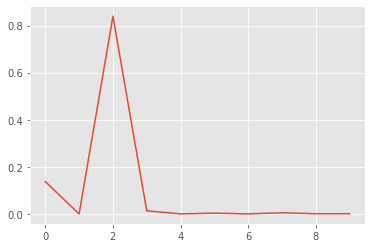

In [27]:
x, y = list(range(len(p0))), p0
plt.plot(x, y);